This notebook will be used to test the script defined in this folder.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imp
import sys
sys.path.append("/Users/sandesh/repos/quantum-ml/Nanowire Model/")

## Testing of the potential profile script

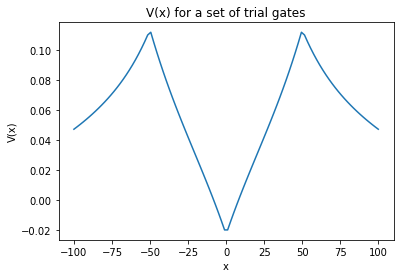

In [10]:
import potential_profile
N_grid = 100
x = np.linspace(-100,100,N_grid,endpoint=True)

# trial potential profile
gate1 = {'peak' : 150e-3,'mean' : -50,'rho' : 5, 'h' : 50,'screen' : 50,'alpha' : 1.0}
gate2 = {'peak' : -150e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 50,'alpha' : 1.0}
gate3 = {'peak' : 150e-3,'mean' : 50,'rho' : 5, 'h' : 50,'screen' : 50,'alpha' : 1.0}
trial_gates = [gate1,gate2,gate3]

V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class

{'tunnel_vec': array([ 0.00205306,  0.00205306]), 'charge': (5,), 'sensor': [0.099998163503300944], 'cap_model': (array([ 5.24076449]), array([[ 0.00137438]])), 'current': 5.1212143258962048e-17, 'state': 1}


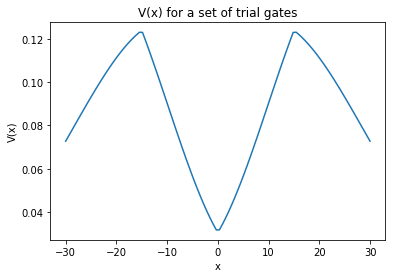

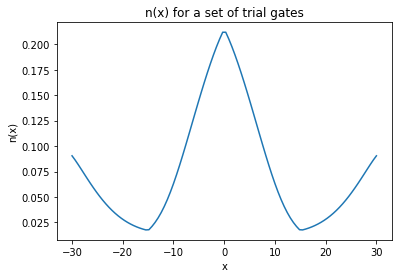

In [74]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

# trial potential profile
N_grid = 100
system_size = 60
x = np.linspace(-system_size/2,system_size/2,N_grid,endpoint=True)

gate1 = {'peak' : 200e-3,'mean' : -15,'rho' : 50, 'h' : 25,'screen' : 50,'alpha' : 1.0}
gate2 = {'peak' : -200e-3,'mean' : 0,'rho' : 50, 'h' : 25,'screen' : 50,'alpha' : 1.0}
gate3 = {'peak' : 200e-3,'mean' : 15,'rho' : 50, 'h' : 25,'screen' : 50,'alpha' : 1.0}
gates = [gate1,gate2,gate3]

V = potential_profile.calc_V(x,gates)
plt.figure(1)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'K_0' : 1e-2, 
           'sigma' : 1.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 5e-2,
           'c_k' : 1e-3,
           'beta' : 50,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 10.0,
           'V_L' : 5e-5,
           'V_R' : -5e-5,
           'short_circuit_current' : 1.0,
           'attempt_rate_coef' : 1,
           'sensors' : [(0,50)],
           'barrier_current' : 1.0,
           }
K_mat = thomas_fermi.calc_K_mat(x,physics['K_0'],physics['sigma'])
physics['K_mat'] = K_mat

tf = thomas_fermi.ThomasFermi(physics)
output = tf.output_wrapper()

print(output)

plt.figure(2)
plt.plot(x,tf.n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

# Testing of Random Single Dot script

In [96]:
import random_single_dot
imp.reload(random_single_dot)

%lprun -f thomas_fermi.ThomasFermi.calc_n random_single_dot.calc_plunger_trace(100)

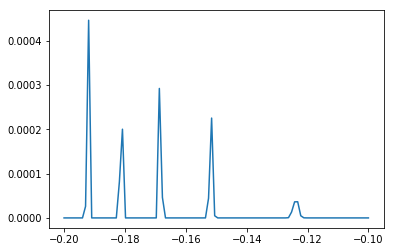

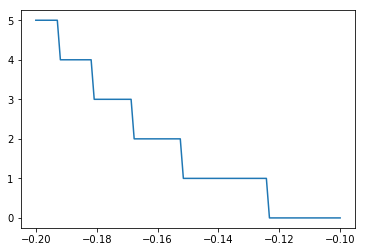

In [82]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [x['charge'] for x in result['output']]
plt.figure(1)
plt.plot(V_P_vec,current_vec)
plt.figure(2)
plt.plot(V_P_vec,charge_vec)

In [85]:
%load_ext line_profiler
%lprun

In [ ]:
## single dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_1D_trace(256)

f.map(range(1))

## Single Dot Barrier map

In [10]:
import random_single_dot
imp.reload(random_single_dot)

N_v = 50
res = random_single_dot.calc_barrier_map(N_v,V_p = -180e-3)

Physics
 {'D': 2, 'sensors': [(0, 50)], 'mu_R': -5e-05, 'bias': 0.0001, 'kT': 1e-05, 'V': array([ 0.13435992,  0.13969526,  0.14508151,  0.15051294,  0.15598339,
        0.16148626,  0.16701451,  0.1725607 ,  0.17811701,  0.18367522,
        0.18922679,  0.19476288,  0.20027439,  0.20575203,  0.21118635,
        0.21656786,  0.22188701,  0.22713437,  0.23230062,  0.23737671,
        0.24235388,  0.24722379,  0.25197856,  0.25661092,  0.26111419,
        0.26548244,  0.26655023,  0.26336934,  0.26006534,  0.25665289,
        0.25314728,  0.24956438,  0.24592055,  0.2422325 ,  0.2385172 ,
        0.23479176,  0.23107329,  0.22737879,  0.22372502,  0.22012836,
        0.2166047 ,  0.21316934,  0.20983681,  0.20662082,  0.20353412,
        0.20058842,  0.19779429,  0.19516106,  0.1926968 ,  0.19040822,
        0.19048224,  0.19291753,  0.19552454,  0.19829393,  0.2012151 ,
        0.20427623,  0.20746437,  0.21076559,  0.21416502,  0.21764703,
        0.2211953 ,  0.22479302,  0.22842294, 

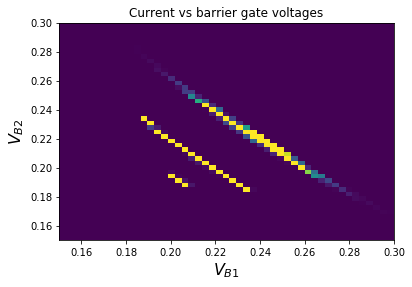

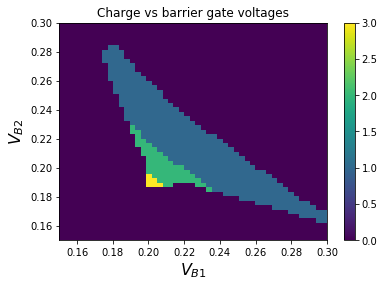

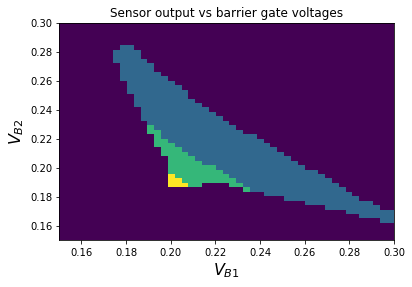

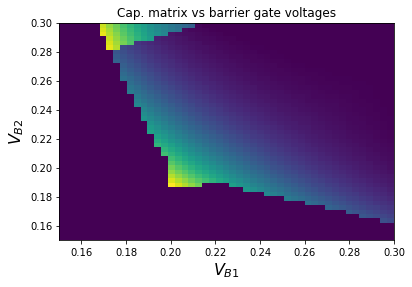

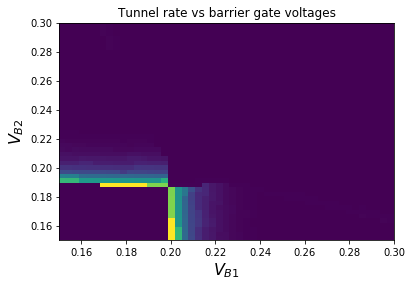

In [11]:
V_B1= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
V_B2= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
XX,YY = np.meshgrid(V_B1,V_B2)

plt.figure(1)
plt.pcolor(XX,YY,np.array(res['current']).reshape(N_v,N_v),vmax=1e-6)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,np.array(res['charge']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,np.array(res['sensor']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Sensor output vs barrier gate voltages")
plt.figure(4)
plt.pcolor(XX,YY,np.array([np.sum(y[0]) for y in res['cap_model']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Cap. matrix vs barrier gate voltages")
plt.figure(5)
plt.pcolor(XX,YY,np.array([y[0] for y in res['tunnel_vec']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Tunnel rate vs barrier gate voltages")

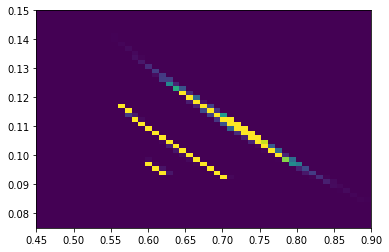

In [18]:
# testing of affine transformation
# NOPE! THIS FAILS.
A = np.array([[1,0],[0,1]])
X_t = np.zeros(len(V_B1))
Y_t = np.zeros(len(V_B2))
for i in range(len(V_B1)):
    X_t[i] = 2*V_B1[i] + V_B2[i]
    Y_t[i] = V_B2[i] - 0.5*V_B1[i]

XX_t,YY_t = np.meshgrid(X_t,Y_t)
plt.pcolor(XX_t,YY_t,np.array(res['current']).reshape(N_v,N_v),vmax=1e-6)

In [34]:
## double dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_barrier_map(100)

f.map(range(100))

/usr/local/lib/python3.5/site-packages/ipyparallel/client/client.py:442: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@192.168.1.133')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


<AsyncMapResult: f>

10


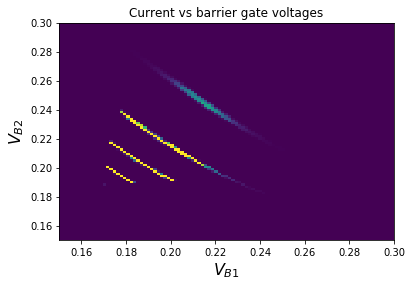

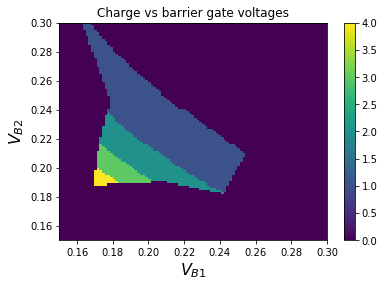

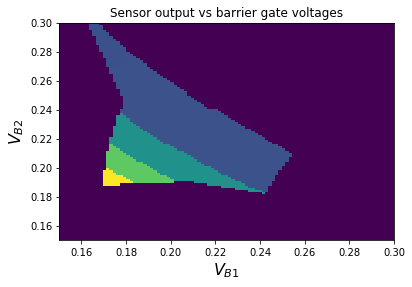

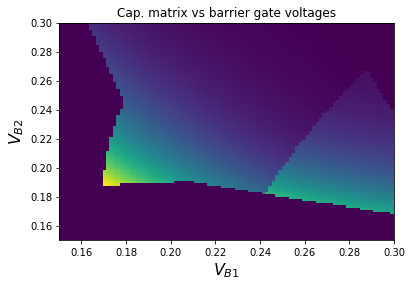

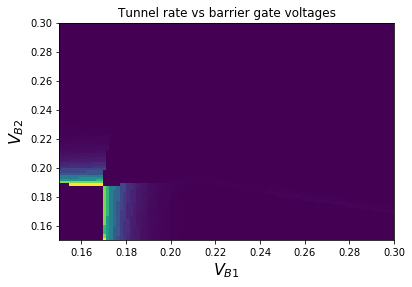

In [48]:
import glob
files = glob.glob("/Users/sandesh/data/single_dot/20171106-06*")
print(len(files))
res = np.load(files[6]).item()
V_B1= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
V_B2= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
XX,YY = np.meshgrid(V_B1,V_B2)

plt.figure(1)
plt.pcolor(XX,YY,np.array(res['current']).reshape(N_v,N_v),vmax=1e-5)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,np.array(res['charge']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,np.array(res['sensor']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Sensor output vs barrier gate voltages")
plt.figure(4)
plt.pcolor(XX,YY,np.array([np.sum(y[0]) for y in res['cap_model']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Cap. matrix vs barrier gate voltages")
plt.figure(5)
plt.pcolor(XX,YY,np.array([y[0] for y in res['tunnel_vec']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Tunnel rate vs barrier gate voltages")